# Multivariate Data Analysis Exercises

This is the second exercise notebook you are going to work on in this course. 
In this notebook, you will write and execute your own code. 
Questions cover concepts of summary statistics, bivariate and multivariate analysis and basics of regression. 
Questions will be similar to what is discussed in Labs and Practices, 
including the extra sets of notebooks. 

In this exercise notebook, you will be dealing with housing dataset. 
Be sure to follow the directions carefully. 
Write as well as execute code in the designated cells.

---

**Question 1**: Read in the file `/dsa/data/all_datasets/housing/housing.txt` Name this data frame "`housing_data`".

In [1]:
# Execute your code for question 1 here
# -------------------------------------
housing_data <- read.table("/dsa/data/all_datasets/housing/housing.txt", header=FALSE)

#housing_data <-  
head(housing_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


The dataset does not have column headers. 
Since this is a small dataset, we can add the names manually. 
If the dataset contains hundreds of columns, then we have to get the names programmatically from dataset description files.

---

**Question 2**: The below is the associated **readme** file with information on getting column names of housing_data. 
The column names are listed under attribute information heading in the file. 
Now, put the names into a vector called `headers`. 
Assign the values in headers to housing_data as its column names (Hint: use `names()` function). 



```
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.
       
4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.
```

In [2]:
# Execute your code for question 2 here
# -------------------------------------
# Define the column names as per the dataset description
headers <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
             "TAX", "PTRATIO", "B", "LSTAT", "MEDV")

# Assign column names to the dataset
names(housing_data) <- headers

# Checking if the names are assigned correctly
str(housing_data)



'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


Of the 14 variables in the dataset, `MEDV` is the dependent variable while the other 13 are independent variables.  
`MEDV` reports the median value of owner-occupied homes. 
The independent variables help to explain the variation in median value across tracts.

Before we get into multivariate analysis, we should look for any relations between dependent and independent variables.

**Question 3**:  Draw scatter plots between `MEDV` and all other independent variables using ggplot2 library and `grid.arrange()` function in `gridExtra library`. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



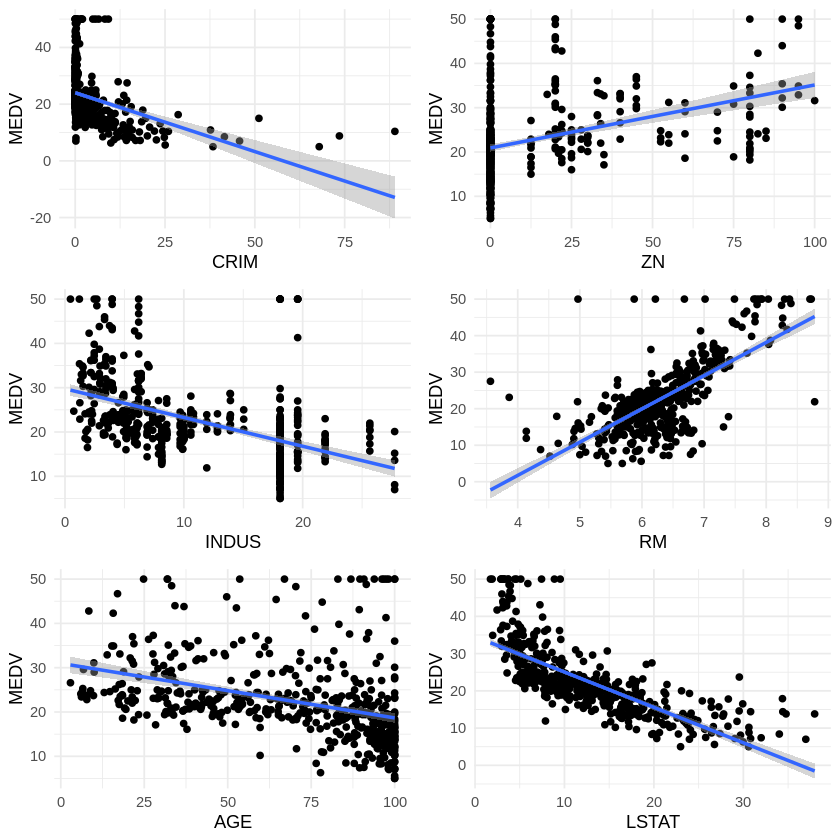

In [3]:
# Execute your code for question 3 here
# -------------------------------------
library(ggplot2)
library(gridExtra)

grid.arrange(
    ggplot(housing_data, aes(x=CRIM, y=MEDV)) + xlab("CRIM") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ggplot(housing_data, aes(x=ZN, y=MEDV)) + xlab("ZN") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ggplot(housing_data, aes(x=INDUS, y=MEDV)) + xlab("INDUS") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ggplot(housing_data, aes(x=RM, y=MEDV)) + xlab("RM") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ggplot(housing_data, aes(x=AGE, y=MEDV)) + xlab("AGE") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ggplot(housing_data, aes(x=LSTAT, y=MEDV)) + xlab("LSTAT") + ylab("MEDV") + 
    geom_point() + geom_smooth(method=lm) + theme_minimal(),

    ncol=2
)


**Question 4**: Identify the variables that have a correlation of greater than 0.45 or less than -0.45  with `MEDV`. Plot the  correlation matrix.

[1] "INDUS"   "RM"      "TAX"     "PTRATIO" "LSTAT"

corrplot 0.84 loaded



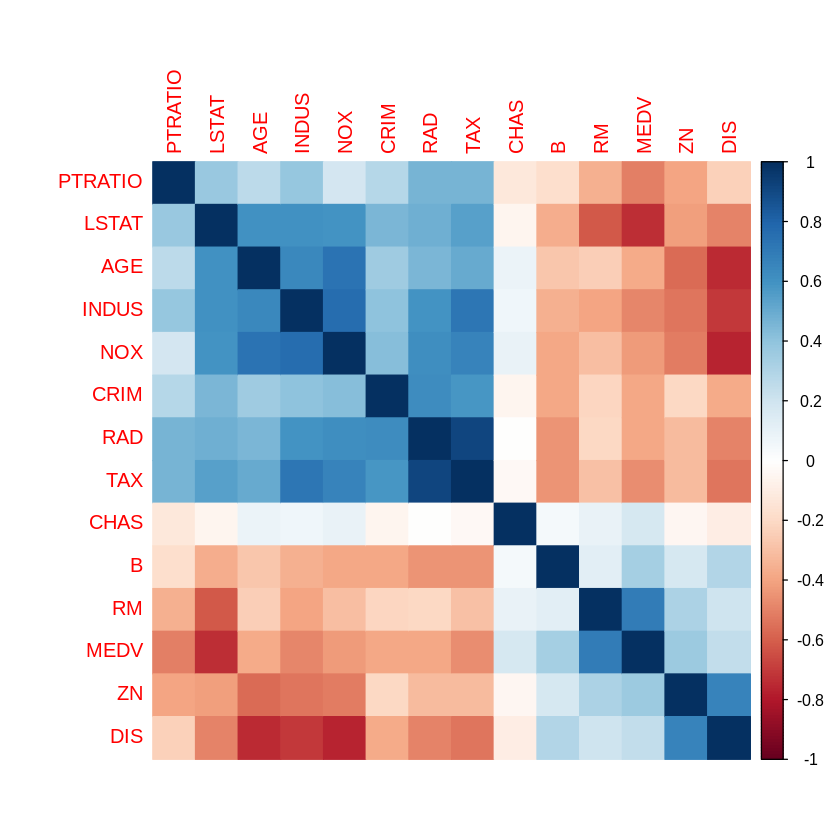

In [4]:
# Execute your code for question 4 here
# -------------------------------------
# Compute correlation matrix
cor_matrix <- cor(housing_data)

# Identifying variables with correlation greater than 0.45 or less than -0.45 with MEDV
significant_vars <- names(which(abs(cor_matrix["MEDV", -length(headers)]) > 0.45))
significant_vars

# Loading corrplot package and plot correlation matrix
library(corrplot)
corrplot(cor_matrix, order="hclust", method="color")

In [6]:
head(cor_matrix)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00000000,-0.20046922,0.40658341,-0.05589158,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
ZN,-0.20046922,1.00000000,-0.53382819,-0.04269672,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
INDUS,0.40658341,-0.53382819,1.00000000,0.06293803,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
CHAS,-0.05589158,-0.04269672,0.06293803,1.00000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
NOX,0.42097171,-0.51660371,0.76365145,0.09120281,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
RM,-0.21924670,0.31199059,-0.39167585,0.09125123,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599


**Question 5**: Draw individual scatter plots for variables which are identified in the above question.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



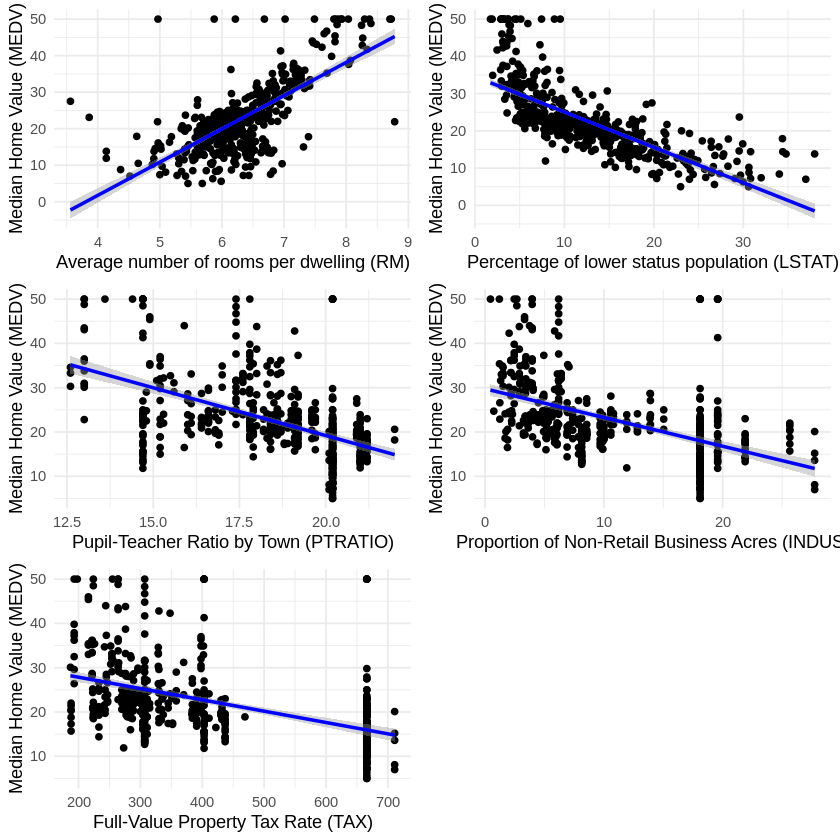

In [7]:
# Execute your code for question 5 here
# -------------------------------------
library(ggplot2)
library(gridExtra)

# Creating scatter plots for each highly correlated variable according to the above.
grid.arrange(
    ggplot(housing_data, aes(x=RM, y=MEDV)) + 
        xlab("Average number of rooms per dwelling (RM)") + 
        ylab("Median Home Value (MEDV)") + 
        geom_point() + geom_smooth(method=lm, col="blue") + theme_minimal(),

    ggplot(housing_data, aes(x=LSTAT, y=MEDV)) + 
        xlab("Percentage of lower status population (LSTAT)") + 
        ylab("Median Home Value (MEDV)") + 
        geom_point() + geom_smooth(method=lm, col="blue") + theme_minimal(),

    ggplot(housing_data, aes(x=PTRATIO, y=MEDV)) + 
        xlab("Pupil-Teacher Ratio by Town (PTRATIO)") + 
        ylab("Median Home Value (MEDV)") + 
        geom_point() + geom_smooth(method=lm, col="blue") + theme_minimal(),

    ggplot(housing_data, aes(x=INDUS, y=MEDV)) + 
        xlab("Proportion of Non-Retail Business Acres (INDUS)") + 
        ylab("Median Home Value (MEDV)") + 
        geom_point() + geom_smooth(method=lm, col="blue") + theme_minimal(),

    ggplot(housing_data, aes(x=TAX, y=MEDV)) + 
        xlab("Full-Value Property Tax Rate (TAX)") + 
        ylab("Median Home Value (MEDV)") + 
        geom_point() + geom_smooth(method=lm, col="blue") + theme_minimal(),

    ncol=2  # Arranging in a grid with 2 columns
)

The scatter plot between MEDV and RM is catching attention. 
Let's see what is interesting about it. 

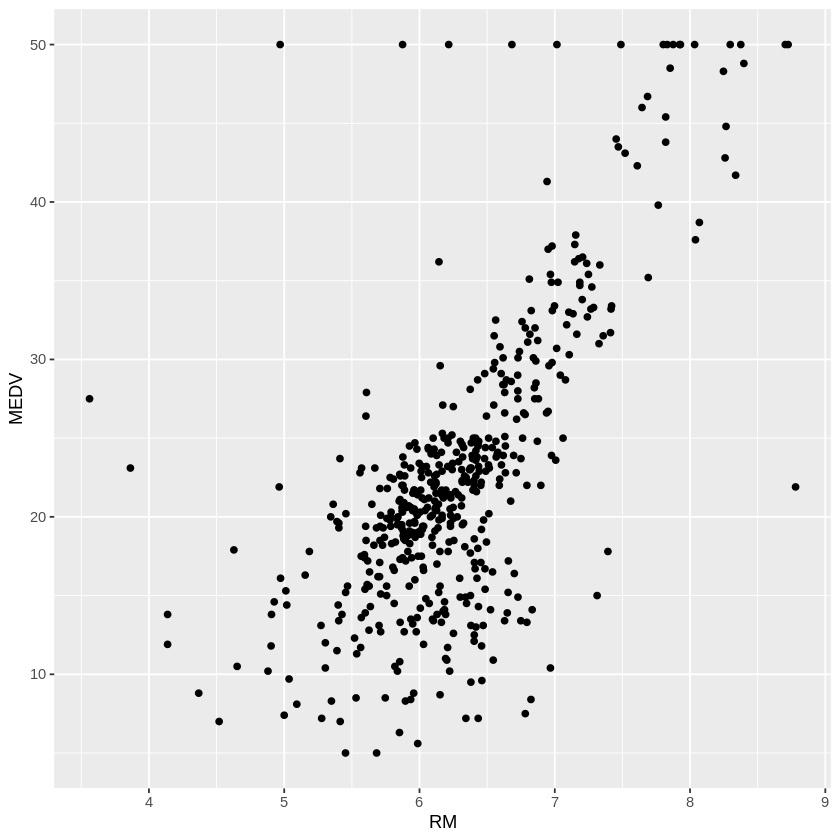

In [8]:
ggplot(housing_data,aes(x=RM, y=MEDV))+geom_point()

When we look at the median home value, there seem to exist some outliers that are set to $50,000 for 16 rows. 
They could be outliers in the dataset. 

**Question 6**: Remove the rows from the dataset where the MEDV value is set to $50,000. 

In [9]:
# Execute your code for question 6 here
# -------------------------------------

# Removing rows where MEDV is 50
housing_data <- housing_data[housing_data$MEDV < 50, ]

# Verifying if rows are removed
summary(housing_data$MEDV)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   16.70   20.90   21.64   24.68   48.80 

**Question 7**: Draw a scatter plot with RM on x-axis, MEDV on y-axis. Assign INDUS to **size** and TAX to **color** visual variables.

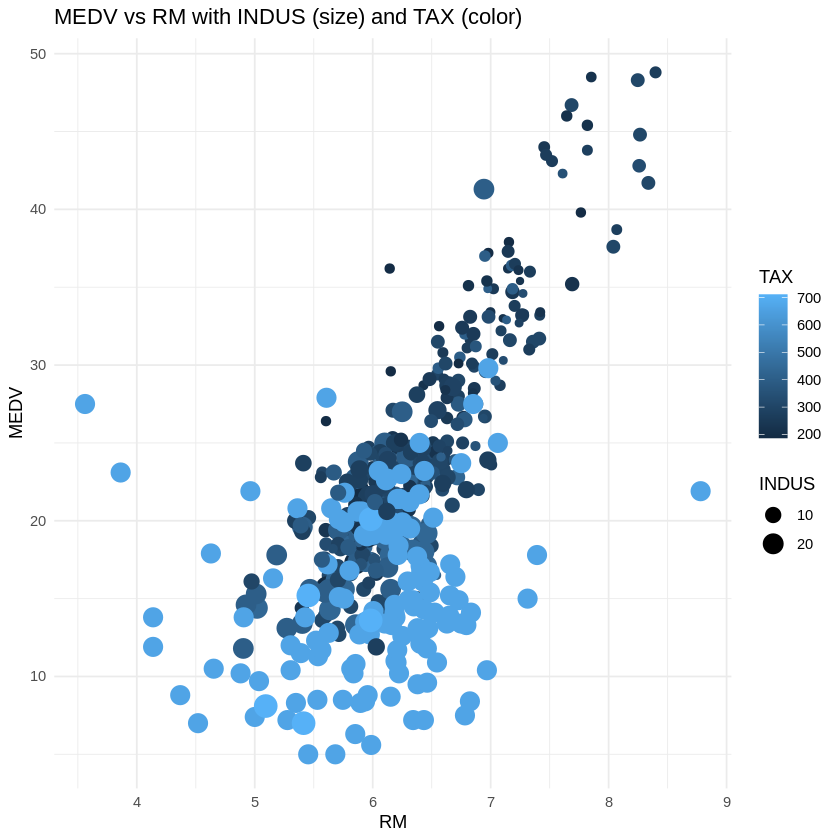

In [10]:
# Execute your code for question 7 here
# -------------------------------------
ggplot(housing_data, aes(x=RM, y=MEDV, size=INDUS, color=TAX)) + 
    geom_point() + 
    labs(title="MEDV vs RM with INDUS (size) and TAX (color)") + 
    theme_minimal()

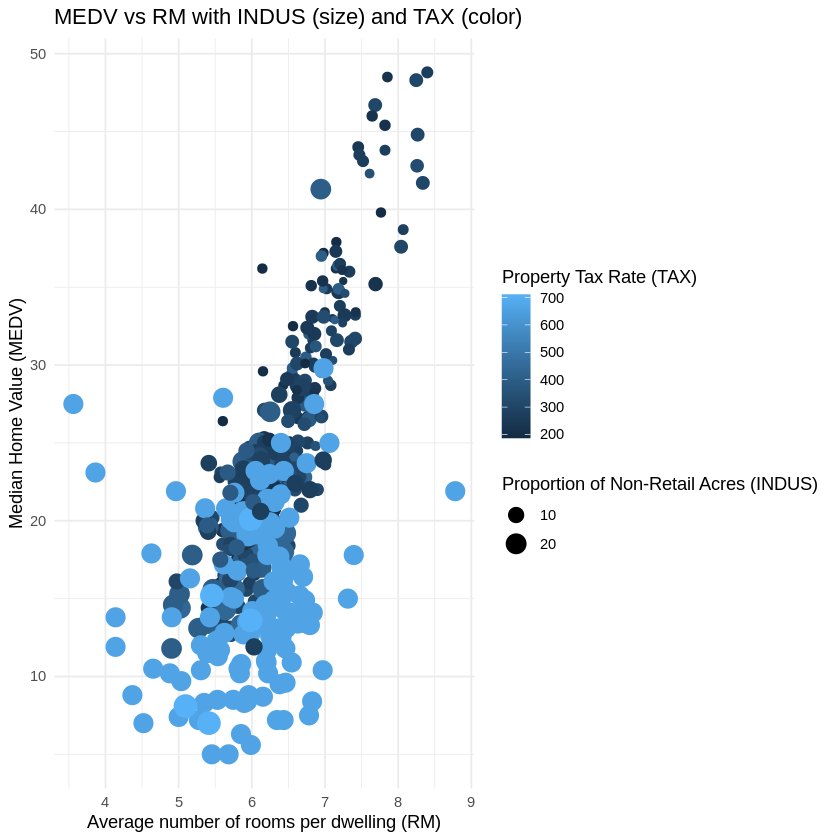

In [16]:
# Execute your code for question 7 here
# -------------------------------------
ggplot(housing_data, aes(x=RM, y=MEDV, size=INDUS, color=TAX)) + 
    geom_point() + 
    labs(title="MEDV vs RM with INDUS (size) and TAX (color)",
         x="Average number of rooms per dwelling (RM)",
         y="Median Home Value (MEDV)",
         size="Proportion of Non-Retail Acres (INDUS)",
         color="Property Tax Rate (TAX)") +
    theme_minimal()


We want to include LSTAT and PTRATIO variables because both have a correlation of more than 0.5. But, we can only use **shape** visual variable as our fifth visual channel. Variables INDUS and TAX tell us the same story. If there are more industries in the area, the taxes will be high. So we will exclude TAX from our analysis.

**Question 8**: Draw a scatter plot with LSTAT on x-axis, MEDV on y-axis. Assign INDUS to **size**, RM to **shape**, and PTRATIO to **color** visual variables.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 431. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 483 rows containing missing values (geom_point).”


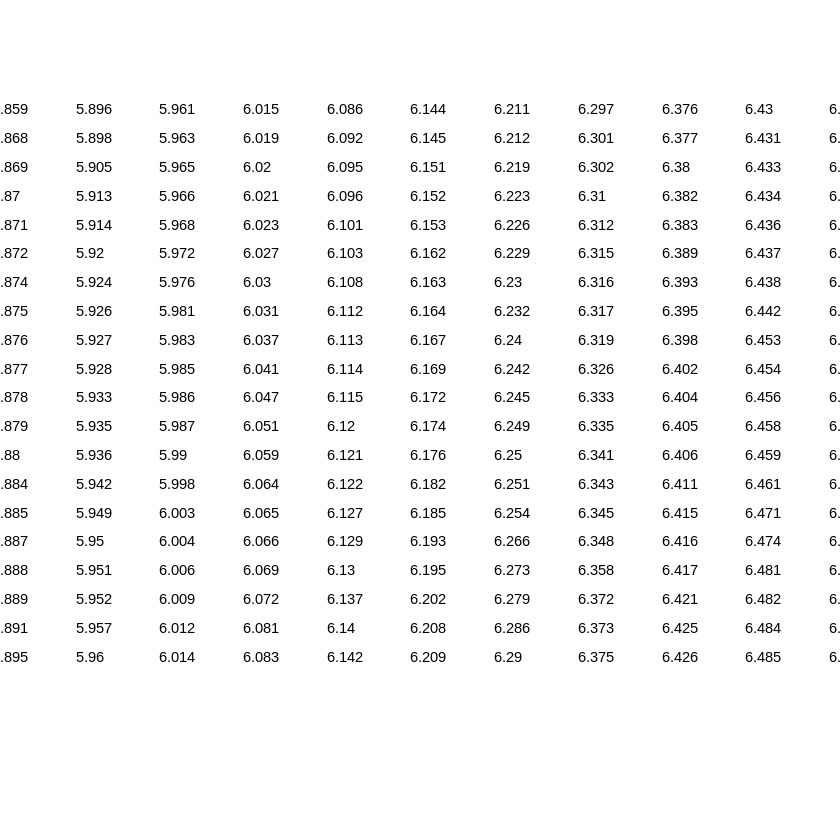

In [12]:
# Execute your code for question 8 here
# -------------------------------------
ggplot(housing_data, aes(x=LSTAT, y=MEDV)) + 
    geom_point(aes(size=INDUS, shape=factor(RM), color=PTRATIO)) + 
    labs(title="Scatter Plot: MEDV vs LSTAT",
         x="Percentage of lower status population (LSTAT)", 
         y="Median Home Value (MEDV)", 
         color="Pupil-Teacher Ratio (PTRATIO)", 
         shape="Avg Rooms (RM)", 
         size="Non-Retail Acres (INDUS)") +
    theme_minimal()


Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 431. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 483 rows containing missing values (geom_point).”


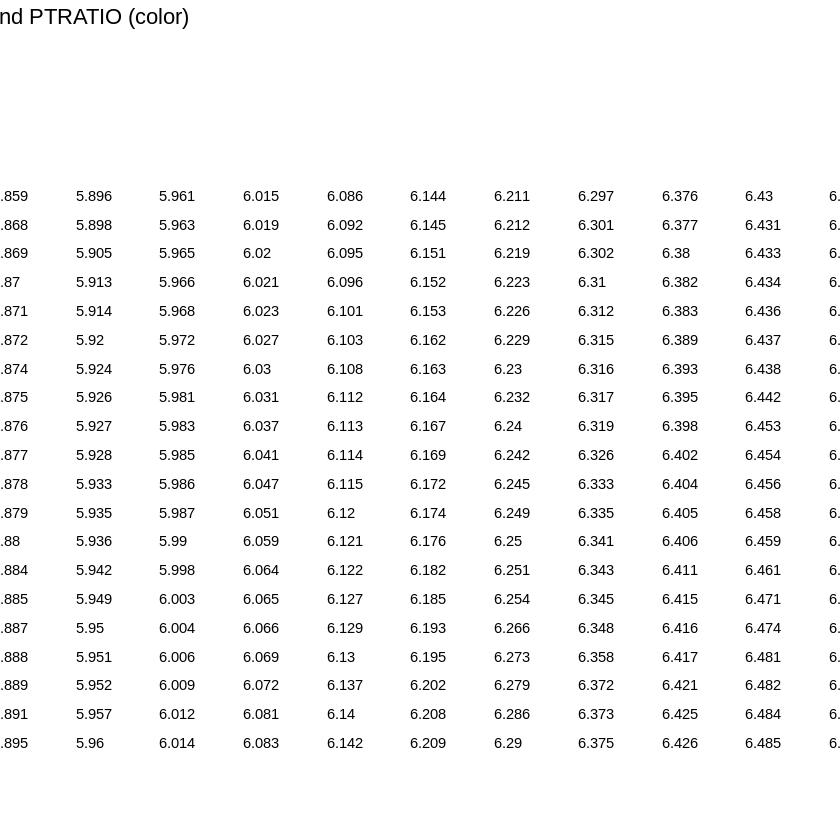

In [11]:
# Execute your code for question 8 here
# -------------------------------------
ggplot(housing_data, aes(x=LSTAT, y=MEDV, size=INDUS, shape=factor(RM), color=PTRATIO)) + 
    geom_point() + 
    labs(title="MEDV vs LSTAT with INDUS (size), RM (shape), and PTRATIO (color)") + 
    theme_minimal()

**Question 9:** Fit a linear regression model to predict MEDV using the RM variable. What is the multiple R-squared value you got for the model?

In [13]:
# Execute your code for question 9 here
# -------------------------------------
fit1 <- lm(MEDV ~ RM, data=housing_data)

# Display summary
summary(fit1)


Call:
lm(formula = MEDV ~ RM, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6928  -2.2840   0.4704   3.1676  28.0608 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.0051     2.4886  -12.06   <2e-16 ***
RM            8.2686     0.3963   20.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.724 on 488 degrees of freedom
Multiple R-squared:  0.4715,	Adjusted R-squared:  0.4704 
F-statistic: 435.3 on 1 and 488 DF,  p-value: < 2.2e-16


**Question 10:** Fit a linear regression model to predict MEDV using all independent variables. What is the multiple R-squared value you got for the model?

In [14]:
# Execute your code for question 10 here
# -------------------------------------
fit2 <- lm(MEDV ~ ., data=housing_data)

# Display summary of the model
summary(fit2)


Call:
lm(formula = MEDV ~ ., data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3101  -2.3082  -0.5764   1.7472  15.8830 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.229842   4.123534   7.816 3.53e-14 ***
CRIM         -0.106716   0.026107  -4.088 5.12e-05 ***
ZN            0.035313   0.011270   3.133 0.001834 ** 
INDUS        -0.043883   0.049811  -0.881 0.378764    
CHAS          0.452209   0.741682   0.610 0.542347    
NOX         -12.398108   3.056812  -4.056 5.83e-05 ***
RM            3.759453   0.357358  10.520  < 2e-16 ***
AGE          -0.023679   0.010652  -2.223 0.026681 *  
DIS          -1.210965   0.160649  -7.538 2.43e-13 ***
RAD           0.251302   0.053083   4.734 2.91e-06 ***
TAX          -0.013777   0.002999  -4.594 5.57e-06 ***
PTRATIO      -0.838180   0.105363  -7.955 1.32e-14 ***
B             0.007853   0.002131   3.686 0.000254 ***
LSTAT        -0.350108   0.042518  -8.234 1.75e-15 ***
---
S

There may be a significant increase in the model accuracy when all independent features are included in the model, but in a real world problem, this often will lead to an **overfit** of the model; the model may do well on training dataset, but it may fail to make correct predictions on unknown test data. 
So, it is better to fit a model with a right mix of most significant variables which can explain most variability 
in the data and at the same time **not overfit** the data. 

One common thing we can do is to remove features from the model which do not provide any new information, relative to existing features. 
Features which are highly correlated may often provide the same amount and kind of information depending upon how much they are correlated. 
We can eliminate those kinds of redundant variables from the model. 

**Question 11:** Fit a linear regression model to predict MEDV using independent variables which have a correlation greater than 0.45 or less than -0.45. What is the multiple R-squared value you got for this model?

In [15]:
# Execute your code for question 11 here
# -------------------------------------
# Fitting the linear regression model using only the selected variables
fit3 <- lm(MEDV ~ RM + LSTAT + PTRATIO + INDUS + TAX, data=housing_data)

# Display the summary of the model
summary(fit3)


Call:
lm(formula = MEDV ~ RM + LSTAT + PTRATIO + INDUS + TAX, data = housing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4281  -2.6981  -0.6505   2.1148  17.9659 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.448615   3.214962   5.738 1.69e-08 ***
RM           4.143847   0.366777  11.298  < 2e-16 ***
LSTAT       -0.409758   0.040429 -10.135  < 2e-16 ***
PTRATIO     -0.761960   0.100773  -7.561 2.02e-13 ***
INDUS       -0.045478   0.043015  -1.057    0.291    
TAX         -0.006815   0.001700  -4.008 7.10e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.11 on 484 degrees of freedom
Multiple R-squared:  0.7297,	Adjusted R-squared:  0.7269 
F-statistic: 261.4 on 5 and 484 DF,  p-value: < 2.2e-16


The model accuracy has reduced by using only the highly correlated variables to fit the model, but it may perform better on the unknown test data. 
You can play around to add more independent variables that may increase the $R^2$. 

# SAVE YOUR NOTEBOOK